# Satellite quantum communication protocol regardless of the weather
### *From the paper by Mario Mastriani, Sundaraja Sitharama Iyengar and Latesh Kumar*
### By Ouliana Anikienko and Marco Guzzo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.cm as cm

from pylatexenc import *   #requires a LaTeX installation on the computer
from qiskit import *
from qiskit_aer import *
from qiskit_ibm_runtime import *
from qiskit.visualization import plot_histogram
from qiskit.primitives.sampler import Sampler

from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

# Qubit to be teleported

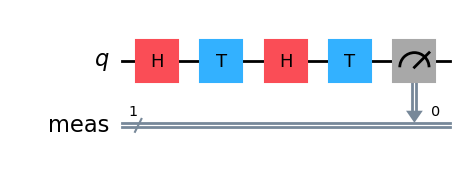

In [2]:
qc = QuantumCircuit(1)

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)

qc.measure_all()
qc.draw(output="mpl",style="iqp",fold=-1,plot_barriers=False)

In [3]:
def teleport():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.t(0)
    qc.h(0)
    qc.t(0)
    return qc

 Quasi probability distribution : [{0: 0.853553390593273, 1: 0.146446609406726}]


C:\Users\marco\AppData\Local\Temp\ipykernel_23156\1971060952.py:5: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(result.quasi_dists)


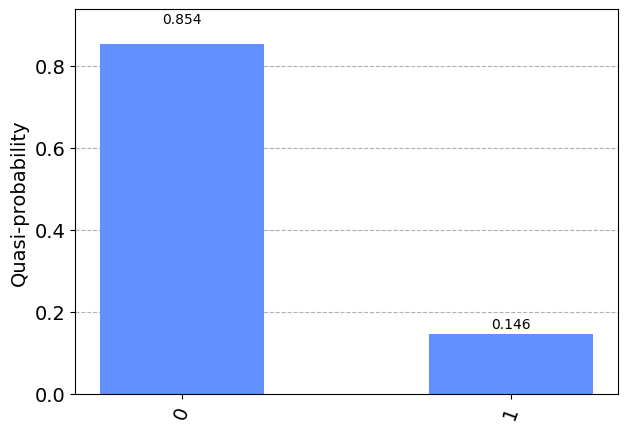

In [4]:
sampler = Sampler()
job = sampler.run(qc)
result = job.result()
print(f' Quasi probability distribution : {result.quasi_dists}')
plot_histogram(result.quasi_dists)

In [5]:
qc = QuantumCircuit(1)

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)

state = DensityMatrix(qc)
# plot_state_city(state, color=['midnightblue', 'crimson'], alpha=0.5, title="",figsize=(10,5))

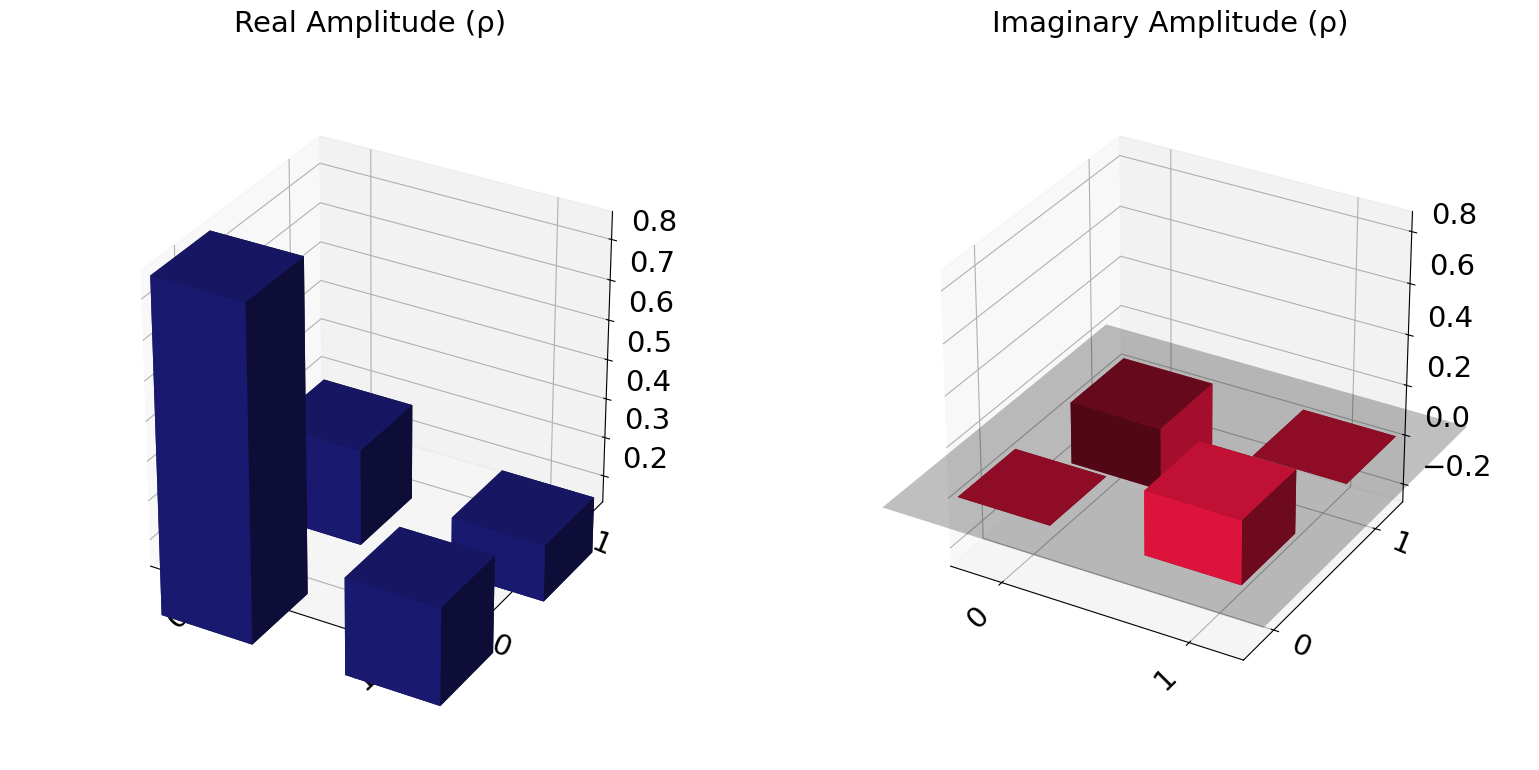

In [6]:
qc = QuantumCircuit(1,1)

qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)

backend = Aer.get_backend('statevector_simulator')
job = transpile(qc, backend)
result = backend.run(job).result()
# plot_state_city(result.get_statevector(qc), color=['midnightblue', 'crimson'],title="")

In [7]:
print(state)

DensityMatrix([[0.85355339+0.j  , 0.25      +0.25j],
               [0.25      -0.25j, 0.14644661+0.j  ]],
              dims=(2,))


In [6]:
real_part = np.real(state)
imaginary_part = np.imag(state)

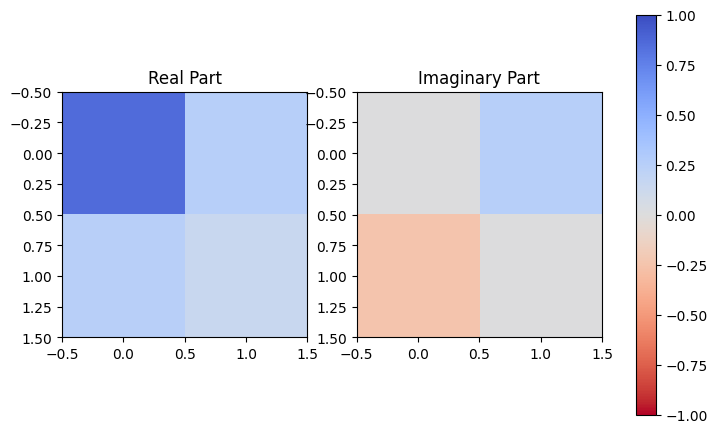

In [7]:
li = [real_part,imaginary_part]
li2 = ["Real Part","Imaginary Part"]

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
cmap = plt.colormaps['coolwarm_r']
normalizer = Normalize(-1, 1)
im = cm.ScalarMappable(norm=normalizer,cmap=cmap)
for i, ax in enumerate(axes.flat):
    ax.imshow(li[i], cmap=cmap, norm=normalizer)
    ax.set_title(li2[i])

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
fig.colorbar(im, ax=axes.ravel().tolist())

plt.show()

# Quantum communication protocol

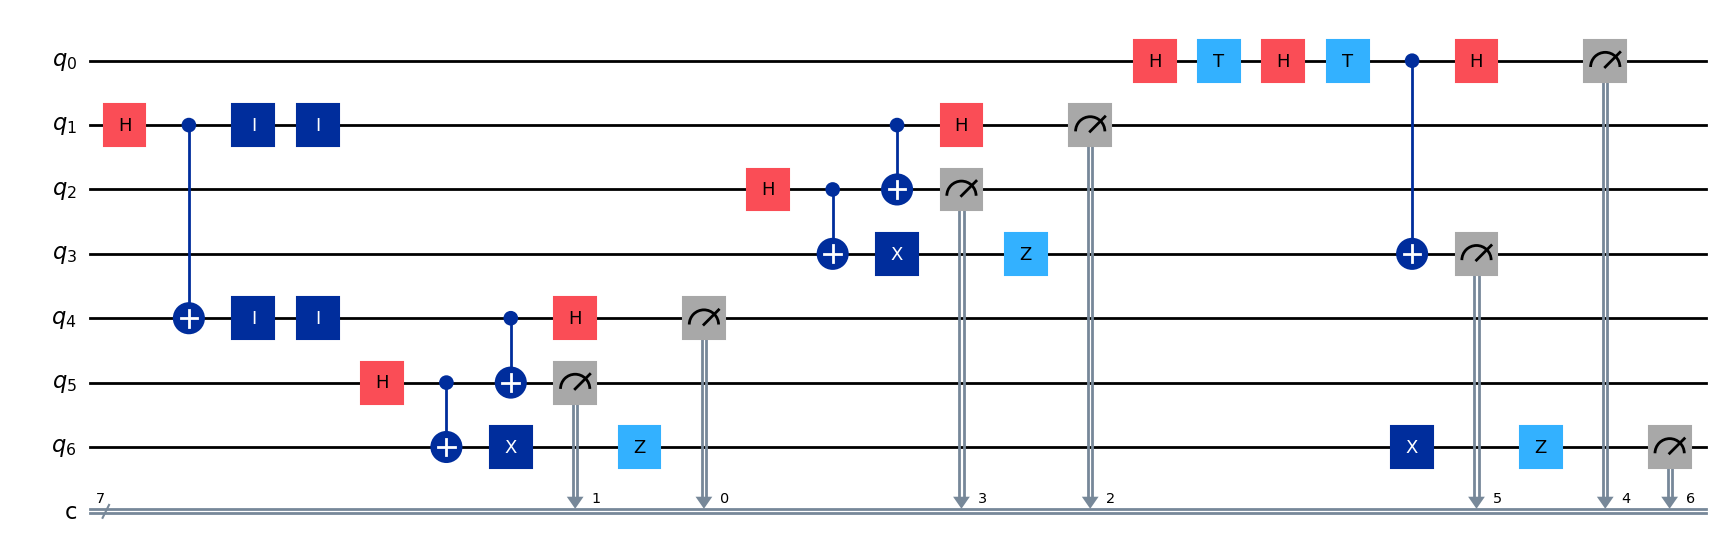

In [8]:
circuit = QuantumCircuit(7,7)

circuit.h(1)
circuit.cx(1,4)

circuit.barrier()

circuit.id([1,4])
circuit.id([1,4])

circuit.barrier()

circuit.h(5)
circuit.cx(5,6)
circuit.cx(4,5)
circuit.h(4)
circuit.measure(4,0)
circuit.measure(5,1)
circuit.x(6)
circuit.z(6)

circuit.barrier()

circuit.h(2)
circuit.cx(2,3)
circuit.cx(1,2)
circuit.h(1)
circuit.measure(1,2)
circuit.measure(2,3)
circuit.x(3)
circuit.z(3)

circuit.barrier()

circuit.compose(teleport(),0,inplace=True)

circuit.barrier()

circuit.cx(0,3)
circuit.h(0)
circuit.measure(0,4)
circuit.measure(3,5)
circuit.x(6)
circuit.z(6)
circuit.measure(6,6)

circuit.draw(output="mpl",style="iqp",fold=-1,plot_barriers=False)

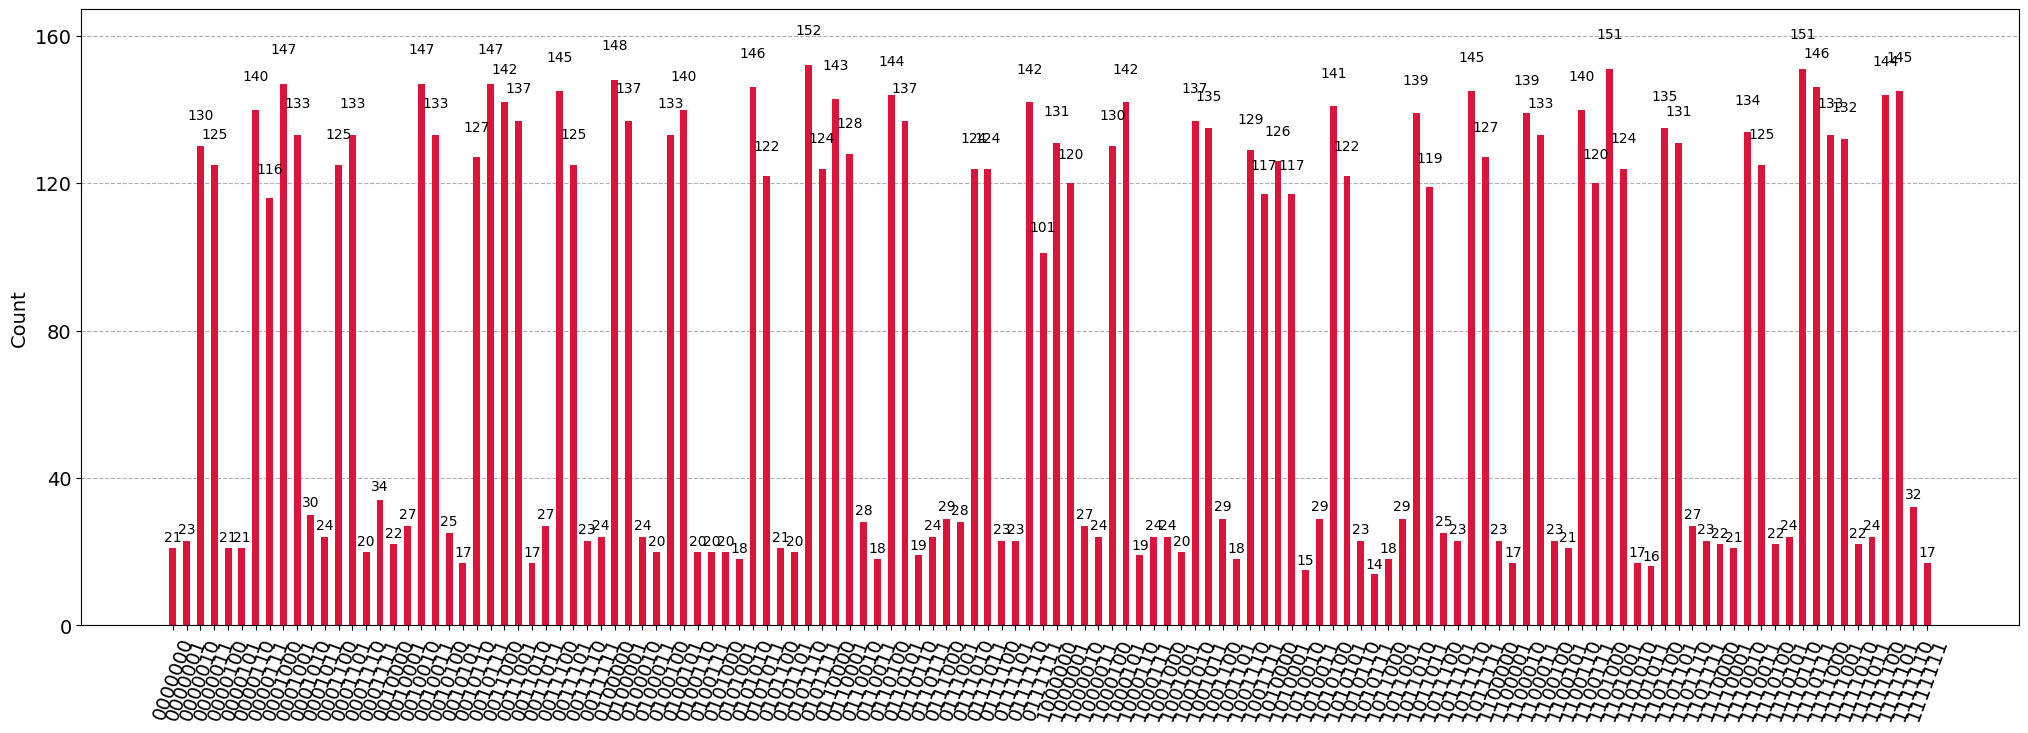

In [11]:
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(circuit,simulator)
result = simulator.run(tqc,shots=10000).result()
counts = result.get_counts()
plot_histogram(counts,figsize=(25,8),color='crimson')

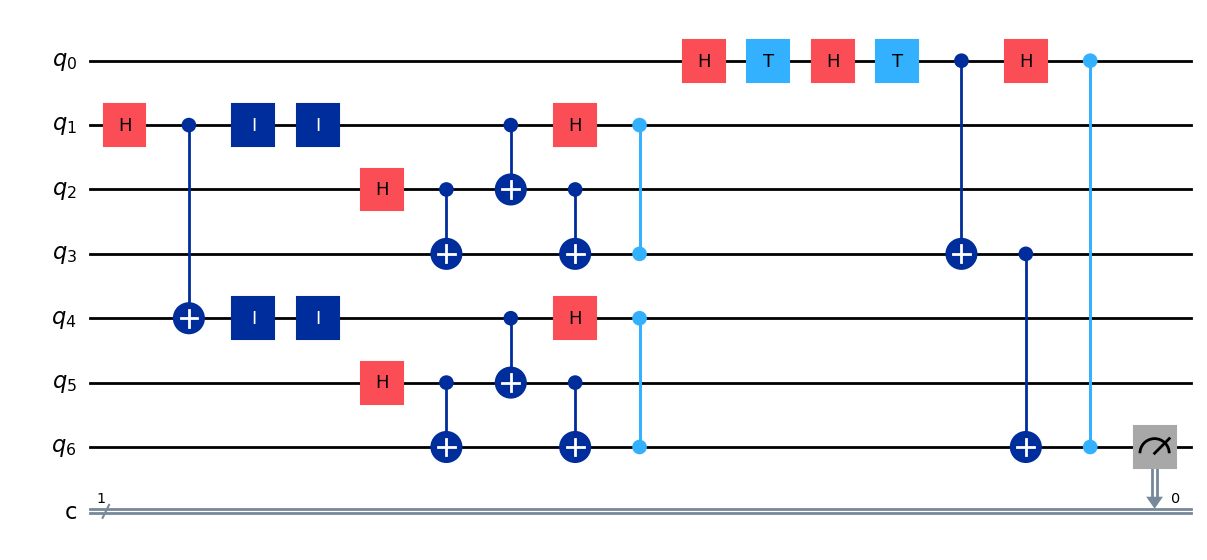

In [9]:
circuit = QuantumCircuit(7,1)

circuit.h(1)
circuit.cx(1,4)

circuit.barrier()

circuit.id([1,4])
circuit.id([1,4])

circuit.barrier()

circuit.h(5)
circuit.cx(5,6)
circuit.cx(4,5)
circuit.h(4)
circuit.cx(5,6)
circuit.cz(4,6)

circuit.h(2)
circuit.cx(2,3)
circuit.cx(1,2)
circuit.h(1)
circuit.cx(2,3)
circuit.cz(1,3)

circuit.barrier()

circuit.compose(teleport(),0,inplace=True)

circuit.barrier()

circuit.cx(0,3)
circuit.h(0)
circuit.cx(3,6)
circuit.cz(0,6)
circuit.measure(6,0)

circuit.draw(output="mpl",style="iqp",fold=-1,plot_barriers=False)

 Quasi probability distribution : [{0: 0.853553390593273, 1: 0.146446609406726}]


C:\Users\marco\AppData\Local\Temp\ipykernel_23156\2704318568.py:5: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(result.quasi_dists)


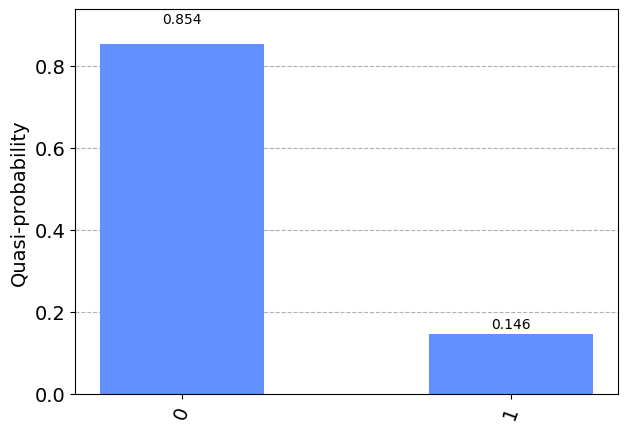

In [10]:
sampler = Sampler()
job = sampler.run(circuit)
result = job.result()
print(f' Quasi probability distribution : {result.quasi_dists}')
plot_histogram(result.quasi_dists)

# Test on real and noisy devices

In [14]:
from providers_script import *
from qiskit.providers import *

In [15]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.measure_all()

In [16]:
circuit = QuantumCircuit(7,1)

circuit.h(1)
circuit.cx(1,4)

circuit.barrier()

circuit.id([1,4])
circuit.id([1,4])

circuit.barrier()

circuit.h(5)
circuit.cx(5,6)
circuit.cx(4,5)
circuit.h(4)
circuit.cx(5,6)
circuit.cz(4,6)

circuit.h(2)
circuit.cx(2,3)
circuit.cx(1,2)
circuit.h(1)
circuit.cx(2,3)
circuit.cz(1,3)

circuit.barrier()

circuit.compose(teleport(),0,inplace=True)

circuit.barrier()

circuit.cx(0,3)
circuit.h(0)
circuit.cx(3,6)
circuit.cz(0,6)
circuit.measure(6,0)

In [17]:
ibm_quantum_service = QiskitRuntimeService(
                            channel="ibm_quantum",
                            token=" ", # TODO put here the api token from IBM Quantum
                            instance="ibm-q/open/main"
                            )

In [18]:
# Defining the provider (here using the provider of snapshots)
fake_provider = FakeProviderForBackendV2()


# Getting all the backends of the fake_provider
fake_backends = fake_provider.backends()


# Selecting a specific backend
fake_Melbourne = search_backend(fake_provider, "fake_melbourne")

# Getting information about these fake backends
print(">> Information about the used backend")

Melbourne_info = get_backend_info(fake_Melbourne)
print_backend_info(Melbourne_info)


>> Information about the used backend
Name:  fake_melbourne
Version:  2.3.14
Online date:  2018-11-06 05:00:00+00:00
Max circuits per job:  None
Number of qubits:  15
System time resolution:
	Input signals:  2.2222222222222221e-10
	Output signals:  2.2222222222222221e-10
Coupling map:
Operations names:  ['id', 'rz', 'sx', 'x', 'cx', 'measure', 'delay']
Target:
	 id
		Qubit(s) (0,): duration=5.333333333333333e-08, error=0.0004183978644302012
		Qubit(s) (1,): duration=5.333333333333333e-08, error=0.0010042524463122974
		Qubit(s) (2,): duration=5.333333333333333e-08, error=0.0006693469486494128
		Qubit(s) (3,): duration=5.333333333333333e-08, error=0.0010612091500236409
		Qubit(s) (4,): duration=5.333333333333333e-08, error=0.0008648278230413689
		Qubit(s) (5,): duration=1.4222222222222222e-07, error=0.0027881350400977855
		Qubit(s) (6,): duration=1.4222222222222222e-07, error=0.0016592402096110034
		Qubit(s) (7,): duration=1.4222222222222222e-07, error=0.0016103212138957879
		Qubit(s) (8

C:\Users\marco\AppData\Local\Temp\ipykernel_3100\1452641181.py:2: DeprecationWarning: The class ``qiskit.providers.fake_provider.fake_provider.FakeProviderForBackendV2`` is deprecated as of qiskit 0.46.0. It will be removed in qiskit 1.0. This class has been migrated to the `qiskit_ibm_runtime` package. To migrate your code, run `pip install qiskit-ibm-runtime` and use `from qiskit_ibm_runtime.fake_provider import FakeProviderExample` instead of `from qiskit.providers.fake_provider import FakeProviderExample`.
  fake_provider = FakeProviderForBackendV2()


### Simulations with Melbourne

In [19]:
print("\n SIMULATIONS")
# Defining the simulator
simulator = ibm_quantum_service.get_backend("ibmq_qasm_simulator") 


# Defining the options
nb_shots = 8192
ideal_options = create_options(nb_shots)
noisy_options = create_options(nb_shots, fake_Melbourne)

#### == Performing experiments on the ideal backend == ### 

print(">> Running experiments on ideal backend for simple teleportation...")
with Session(service = ibm_quantum_service, backend = simulator) as session:
    sampler = Sampler(session = session, options = ideal_options)

    tqc = transpile(qc, simulator)
    job = sampler.run(tqc)
    result_qc_melbourne_ideal = job.result()

    print(result_qc_melbourne_ideal)

print(">> Running experiments on ideal backend for the complete circuit...")
with Session(service = ibm_quantum_service, backend = simulator) as session:
    sampler = Sampler(session = session, options = ideal_options)

    tqc = transpile(circuit, simulator)
    job = sampler.run(tqc)
    result_circuit_melbourne_ideal = job.result()

    print(result_circuit_melbourne_ideal)


#### == Performing experiments on the noisy backend == ### 
# Important: here the simulations are run on simulator only, not on real backends, by using noisy_options
# The following code works only for fake backends (snapshots)

print(">> Running experiments on noisy backend for simple teleportation...")
with Session(service = ibm_quantum_service, backend = simulator) as session:
    sampler = Sampler(session = session, options = noisy_options)

    tqc = transpile(qc, simulator)
    job = sampler.run(tqc)
    result_qc_melbourne_noisy = job.result()

    print(result_qc_melbourne_noisy)

print(">> Running experiments on noisy backend for the complete circuit...")
with Session(service = ibm_quantum_service, backend = simulator) as session:
    sampler = Sampler(session = session, options = noisy_options)

    tqc = transpile(qc, simulator)
    job = sampler.run(tqc)
    result_circuit_melbourne_noisy = job.result()

    print(result_circuit_melbourne_noisy)


 SIMULATIONS
>> Running experiments on ideal backend for simple teleportation...
SamplerResult(quasi_dists=[{1: 0.1446533203125, 0: 0.8553466796875}], metadata=[{'shots': 8192, 'circuit_metadata': {}, 'warning': 'Circuits that do not match the target hardware definition will no longer be supported after March 1, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/run/primitives-examples) to see this coupled with operator transformations.'}])
>> Running experiments on ideal backend for the complete circuit...
SamplerResult(quasi_dists=[{1: 0.1455078125, 0: 0.8544921875}], metadata=[{'shots': 8192, 'circuit_metadata': {}, 'warning': 'Circuits that do not match the target hardware definition will no longer be supported after March 1, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/transpile) for instructions to transform circuits and the p

 Quasi probability distribution : [{1: 0.1446533203125, 0: 0.8553466796875}]


C:\Users\marco\AppData\Local\Temp\ipykernel_3100\2282842098.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(result_qc_melbourne_ideal.quasi_dists)


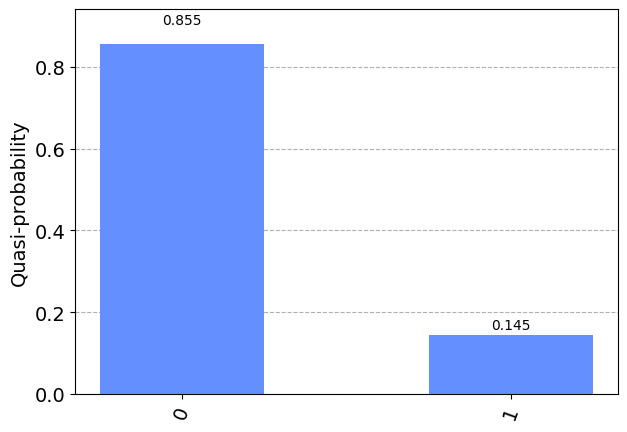

In [20]:
print(f' Quasi probability distribution : {result_qc_melbourne_ideal.quasi_dists}')
plot_histogram(result_qc_melbourne_ideal.quasi_dists)

 Quasi probability distribution : [{0: 0.8348388671875, 1: 0.1651611328125}]


C:\Users\marco\AppData\Local\Temp\ipykernel_3100\1719689588.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(result_qc_melbourne_noisy.quasi_dists)


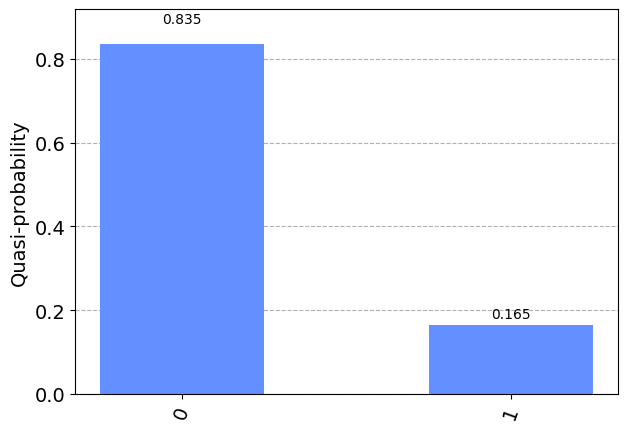

In [21]:
print(f' Quasi probability distribution : {result_qc_melbourne_noisy.quasi_dists}')
plot_histogram(result_qc_melbourne_noisy.quasi_dists)

 Quasi probability distribution : [{1: 0.1455078125, 0: 0.8544921875}]


C:\Users\marco\AppData\Local\Temp\ipykernel_3100\3922774010.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(result_circuit_melbourne_ideal.quasi_dists)


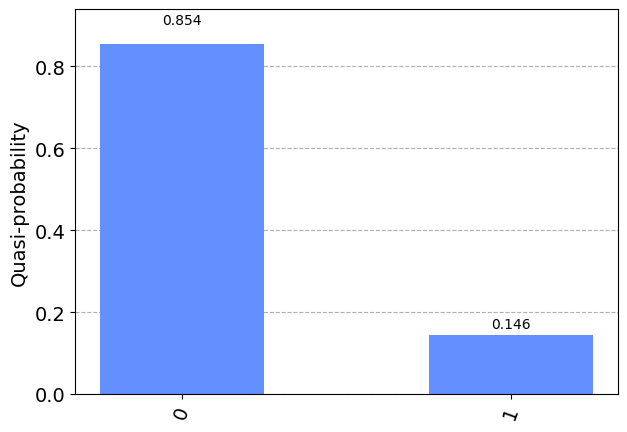

In [22]:
print(f' Quasi probability distribution : {result_circuit_melbourne_ideal.quasi_dists}')
plot_histogram(result_circuit_melbourne_ideal.quasi_dists)

 Quasi probability distribution : [{1: 0.1571044921875, 0: 0.8428955078125}]


C:\Users\marco\AppData\Local\Temp\ipykernel_3100\2268529625.py:2: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(result_circuit_melbourne_noisy.quasi_dists)


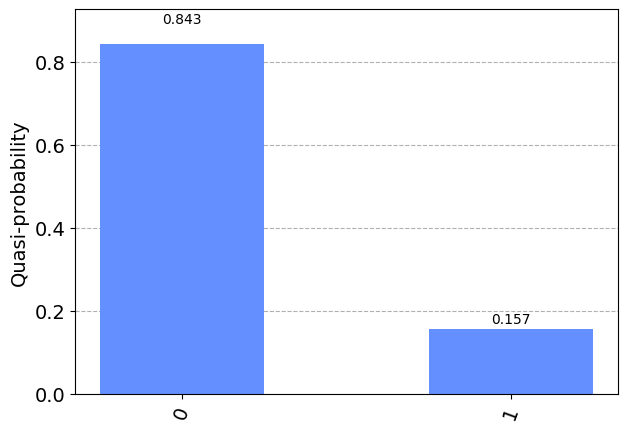

In [23]:
print(f' Quasi probability distribution : {result_circuit_melbourne_noisy.quasi_dists}')
plot_histogram(result_circuit_melbourne_noisy.quasi_dists)

## Simulation on real backend

In [24]:
print("\n SIMULATIONS")
# Defining the simulator
ibm_Brisbane = search_backend(ibm_quantum_service, 'ibm_brisbane')

# Defining the options
nb_shots = 1024

Brisbane_options = create_options(nb_shots, ibm_Brisbane)


#### == Performing experiments on the real backend == ### 

print(">> Running experiments on ideal backend for simple teleportation...")
with Session(service = ibm_quantum_service, backend = ibm_Brisbane) as session:
    sampler = Sampler(session = session, options = ideal_options)

    tqc = transpile(qc, ibm_Brisbane)
    job = sampler.run(tqc)
    result_qc_real = job.result()

    print(result_qc_real)

print(">> Running experiments on ideal backend for the complete circuit...")
with Session(service = ibm_quantum_service, backend = ibm_Brisbane) as session:
    sampler = Sampler(session = session, options = ideal_options)

    tqc = transpile(circuit, ibm_Brisbane)
    job = sampler.run(tqc)
    result_circuit_real = job.result()

    print(result_circuit_real)



 SIMULATIONS
>> Running experiments on ideal backend for simple teleportation...
SamplerResult(quasi_dists=[{0: 0.786865234375, 1: 0.213134765625}], metadata=[{'shots': 8192, 'circuit_metadata': {}}])
>> Running experiments on ideal backend for the complete circuit...
SamplerResult(quasi_dists=[{0: 0.6826171875, 1: 0.3173828125}], metadata=[{'shots': 8192, 'circuit_metadata': {}}])


C:\Users\marco\AppData\Local\Temp\ipykernel_3100\1550490702.py:1: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(result_qc_real.quasi_dists)


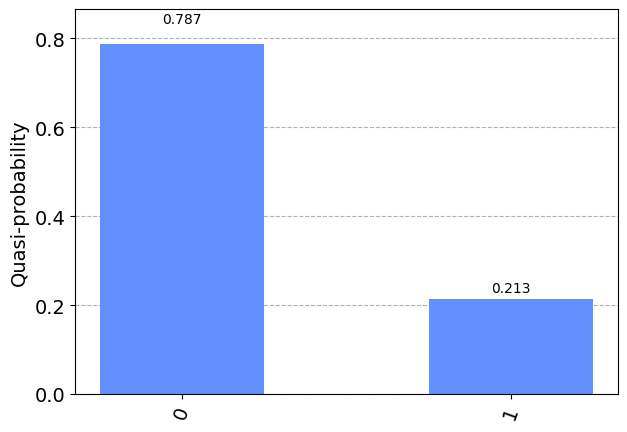

In [25]:
plot_histogram(result_qc_real.quasi_dists)

C:\Users\marco\AppData\Local\Temp\ipykernel_3100\3558984731.py:1: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(result_circuit_real.quasi_dists)


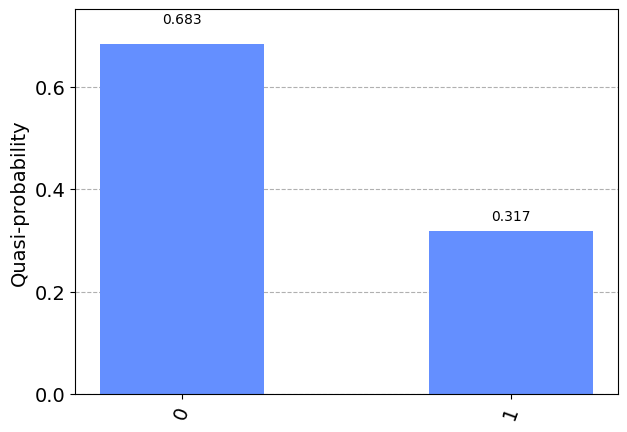

In [26]:
plot_histogram(result_circuit_real.quasi_dists)